In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot

In [16]:
# get formatted and ready to use dataframe
df = get_df()

In [17]:
df.head()

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q12_RE_Most_Difficult_Activity_AligningREData,Q12_RE_Most_Difficult_Activity_Conflicts,Q12_RE_Most_Difficult_Activity_NewQualityAttributes,Q12_RE_Most_Difficult_Activity_Documentation,Q12_RE_Most_Difficult_Activity_SelectingMetrics,Q12_RE_Most_Difficult_Activity_Verification,Q12_RE_Most_Difficult_Activity_ChangingRE,Q12_RE_Most_Difficult_Activity_Customer_Others,Q12_RE_Most_Difficult_Activity_Customer_Others_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99,-99
4,36,Completed (31),1593,Mathmathics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,-99,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,not quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,-99,-99
6,46,Completed (31),2821,Graduation in Actuary,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99,-99


In [19]:
df_q9 = df.filter(regex='Q9')
df_q9.head()

,Q9_RE_Elicitation_Interviews,Q9_RE_Elicitation_Scenarios,Q9_RE_Elicitation_Prototyping,Q9_RE_Elicitation_WorkshopsMeetings,Q9_RE_Elicitation_Observation,Q9_RE_Elicitation_Others,Q9_RE_Elicitation_Others_Free
2,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,-99
3,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,-99
4,quoted,quoted,not quoted,quoted,not quoted,quoted,Literature
5,quoted,not quoted,quoted,not quoted,not quoted,not quoted,-99
6,quoted,quoted,quoted,quoted,not quoted,not quoted,-99


In [20]:
#Responses as others

df_q9_others = df_q9.filter(regex='Others')
df_q9_others

for c in df_q9_others.columns:
    print(c)
    print(df_q9_others[c].value_counts())

Q9_RE_Elicitation_Others
not quoted    183
-77            82
quoted         11
Name: Q9_RE_Elicitation_Others, dtype: int64
Q9_RE_Elicitation_Others_Free                  
-99                                                         183
-66                                                          82
Literature                                                    1
Beer please                                                   1
meetings with stakeholders                                    1
simulating system's behavior                                  1
They were not really, invented                                1
Wishful thinking in the project proposal                      1
Squad's OKRs                                                  1
I don't know                                                  1
analysis of artifacts                                         1
by submitting my undergraduate thesis to the institution      1
Name: Q9_RE_Elicitation_Others_Free                  , dtype

In [22]:
# Pandas DataFrame [quoted per columns]

dict_q9 = {}
for c in df_q9.columns:
    if "Free" and "Others" not in c:
        role = c.split('_')
        dict_q9[role[3:][0]] = df_q9[c].value_counts()['quoted']

df_q9_quoted = pd.DataFrame(data={'Elicitation': list(dict_q9.keys()), 'Answers': list(dict_q9.values())})
df_q9_quoted = df_q9_quoted.sort_values('Answers', ascending=False)
df_q9_quoted

,Elicitation,Answers
0,Interviews,97
1,Scenarios,75
2,Prototyping,75
3,WorkshopsMeetings,74
4,Observation,64


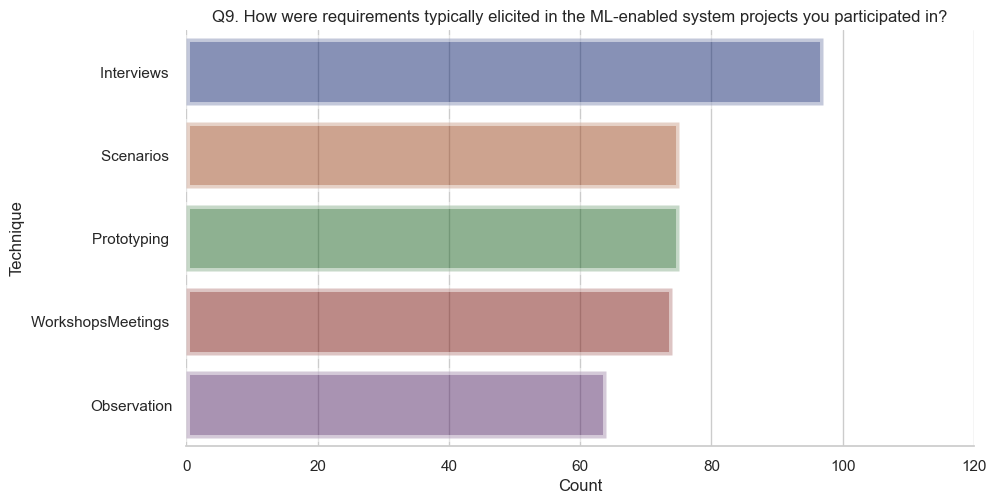

In [23]:
single_barplot(df_q9_quoted, "Answers", "Elicitation",
               title="Q9. How were requirements typically elicited in the ML-enabled system projects you participated in?",
               x_label="Count", y_label="Technique", x_label_rotation=0)